In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
!warnings off

'warnings' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
df = pd.read_csv('marketing_campaign_data.csv', index_col=0)
pd.set_option('display.max_columns', None) #menampilkan semua kolom tanpa ada yang di hide karena terlalu banyak
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Conversion rate analysis based on income, spending and age

In [4]:
df = df[df['NumWebVisitsMonth']!=0]

In [5]:
df['Dt_Customer'] = df['Dt_Customer'].astype('datetime64[ns]')

c:\Users\goodb\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
c:\Users\goodb\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
c:\Users\goodb\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
c:\Users\goodb\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
c:\Users\goodb\anaconda3\lib\site-packages\pandas\core\d

In [6]:
df['Dt_Customer']= df['Dt_Customer'].dt.year


C:\Users\goodb\AppData\Local\Temp\ipykernel_3884\4003673527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dt_Customer']= df['Dt_Customer'].dt.year


In [7]:
df['Age'] = df['Dt_Customer'] - df['Year_Birth']

C:\Users\goodb\AppData\Local\Temp\ipykernel_3884\3903308570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Dt_Customer'] - df['Year_Birth']


In [8]:
df['Age_Segment'] = df['Age'].apply(lambda x: 'Remaja' if x <= 25 else 'Dewasa' if x <= 40 else 'Paruh Baya' if x <= 60 else 'Lansia')
df['Age_Segment'] = df['Age_Segment'].astype('category')

C:\Users\goodb\AppData\Local\Temp\ipykernel_3884\3711420005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Segment'] = df['Age'].apply(lambda x: 'Remaja' if x <= 25 else 'Dewasa' if x <= 40 else 'Paruh Baya' if x <= 60 else 'Lansia')
C:\Users\goodb\AppData\Local\Temp\ipykernel_3884\3711420005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Segment'] = df['Age_Segment'].astype('category')


In [9]:
df['Age_Segment'].value_counts()

Paruh Baya    1098
Dewasa         789
Lansia         226
Remaja         116
Name: Age_Segment, dtype: int64

In [10]:
x = df[df['Response']==0].groupby(['Age_Segment'])['Response'].count().reset_index()
y = df[df['Response']==1].groupby(['Age_Segment'])['Response'].count().reset_index()
x['Respond'] = y['Response']
x = x.rename(columns={'Response':'Not_Respond'})
x['conversion_rate'] = x['Respond']/(x['Not_Respond']+x['Respond'])*100

In [11]:
x

,Age_Segment,Not_Respond,Respond,conversion_rate
0,Dewasa,660,129,16.349810
1,Lansia,192,34,15.044248
2,Paruh Baya,944,154,14.025501
3,Remaja,99,17,14.655172


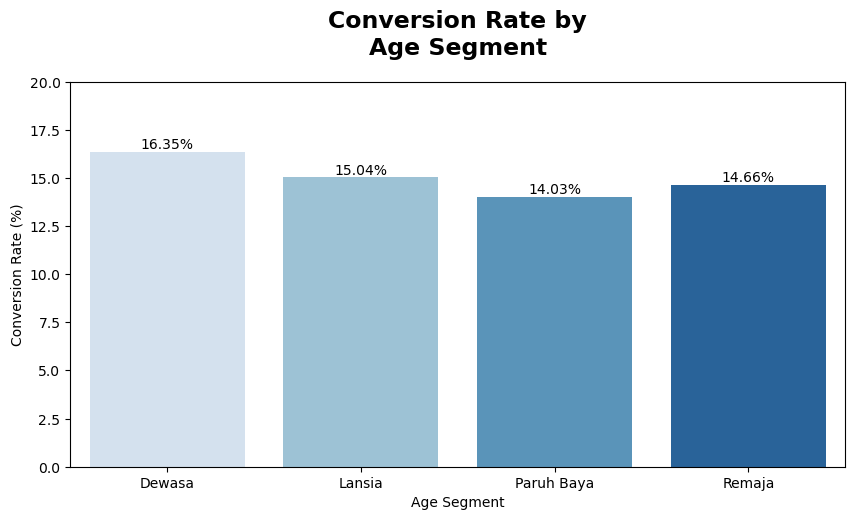

In [12]:
plt.figure(figsize=(10,5))
g = sns.barplot(x=x['Age_Segment'], y=x['conversion_rate'], data=x, palette='Blues')
plt.bar_label(g.containers[0], fmt='%.2f%%')
plt.title('Conversion Rate by\nAge Segment', fontsize=17, fontweight='bold', y=1.05)
plt.ylim(0,20)
plt.xlabel('Age Segment')
plt.ylabel('Conversion Rate (%)')
plt.show()

# Data Cleaning & Preprocessing

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2229 non-null   int64   
 1   Year_Birth           2229 non-null   int64   
 2   Education            2229 non-null   object  
 3   Marital_Status       2229 non-null   object  
 4   Income               2206 non-null   float64 
 5   Kidhome              2229 non-null   int64   
 6   Teenhome             2229 non-null   int64   
 7   Dt_Customer          2229 non-null   int64   
 8   Recency              2229 non-null   int64   
 9   MntCoke              2229 non-null   int64   
 10  MntFruits            2229 non-null   int64   
 11  MntMeatProducts      2229 non-null   int64   
 12  MntFishProducts      2229 non-null   int64   
 13  MntSweetProducts     2229 non-null   int64   
 14  MntGoldProds         2229 non-null   int64   
 15  NumDealsPurchases    

## Handling Missing Values

In [14]:
edu_values = df['Education'].unique()
age_values = df['Age_Segment'].unique()

In [15]:
for edu in edu_values:
    for age in age_values:
        result = df['Income'].loc[(df['Education'] == edu) & (df['Age_Segment'] == age)].isnull().sum()
        print(f"nilai kosong dari {edu} - {age} adalah {result}")

nilai kosong dari S1 - Paruh Baya adalah 6
nilai kosong dari S1 - Dewasa adalah 3
nilai kosong dari S1 - Lansia adalah 1
nilai kosong dari S1 - Remaja adalah 1
nilai kosong dari S3 - Paruh Baya adalah 4
nilai kosong dari S3 - Dewasa adalah 1
nilai kosong dari S3 - Lansia adalah 0
nilai kosong dari S3 - Remaja adalah 0
nilai kosong dari S2 - Paruh Baya adalah 3
nilai kosong dari S2 - Dewasa adalah 1
nilai kosong dari S2 - Lansia adalah 1
nilai kosong dari S2 - Remaja adalah 0
nilai kosong dari SMA - Paruh Baya adalah 0
nilai kosong dari SMA - Dewasa adalah 0
nilai kosong dari SMA - Lansia adalah 0
nilai kosong dari SMA - Remaja adalah 0
nilai kosong dari D3 - Paruh Baya adalah 1
nilai kosong dari D3 - Dewasa adalah 1
nilai kosong dari D3 - Lansia adalah 0
nilai kosong dari D3 - Remaja adalah 0


In [16]:
for edu in edu_values:
   for age in age_values:
      idx = (df['Education'] == edu) & (df['Age_Segment'] == age) & (df['Income'].isnull())
      if idx.any():
         mean_income = df.loc[(df['Education']== edu) & (df['Age_Segment'] == age), 'Income'].mean()
         df.loc[idx, 'Income'] = mean_income
         print(f"{edu} - {age} di isi: {mean_income}")
      else:
         print (f"{edu} - {age} tidak dkosong")
      

S1 - Paruh Baya di isi: 54052890.10989011
S1 - Dewasa di isi: 49946619.16461916
S1 - Lansia di isi: 57204304.347826086
S1 - Remaja di isi: 50136441.176470585
S3 - Paruh Baya di isi: 54696968.253968254
S3 - Dewasa di isi: 53866421.428571425
S3 - Lansia tidak dkosong
S3 - Remaja tidak dkosong
S2 - Paruh Baya di isi: 53998740.0
S2 - Dewasa di isi: 47257256.880733944
S2 - Lansia di isi: 58882361.70212766
S2 - Remaja tidak dkosong
SMA - Paruh Baya tidak dkosong
SMA - Dewasa tidak dkosong
SMA - Lansia tidak dkosong
SMA - Remaja tidak dkosong
D3 - Paruh Baya di isi: 54987680.0
D3 - Dewasa di isi: 40349663.26530612
D3 - Lansia tidak dkosong
D3 - Remaja tidak dkosong


In [17]:
for edu in edu_values:
    for age in age_values:
        result = df['Income'].loc[(df['Education'] == edu) & (df['Age_Segment'] == age)].isnull().sum()
        print(f"nilai kosong dari {edu} - {age} adalah {result}")

nilai kosong dari S1 - Paruh Baya adalah 0
nilai kosong dari S1 - Dewasa adalah 0
nilai kosong dari S1 - Lansia adalah 0
nilai kosong dari S1 - Remaja adalah 0
nilai kosong dari S3 - Paruh Baya adalah 0
nilai kosong dari S3 - Dewasa adalah 0
nilai kosong dari S3 - Lansia adalah 0
nilai kosong dari S3 - Remaja adalah 0
nilai kosong dari S2 - Paruh Baya adalah 0
nilai kosong dari S2 - Dewasa adalah 0
nilai kosong dari S2 - Lansia adalah 0
nilai kosong dari S2 - Remaja adalah 0
nilai kosong dari SMA - Paruh Baya adalah 0
nilai kosong dari SMA - Dewasa adalah 0
nilai kosong dari SMA - Lansia adalah 0
nilai kosong dari SMA - Remaja adalah 0
nilai kosong dari D3 - Paruh Baya adalah 0
nilai kosong dari D3 - Dewasa adalah 0
nilai kosong dari D3 - Lansia adalah 0
nilai kosong dari D3 - Remaja adalah 0


## Handling Duplicate Data

In [18]:
df = df.drop('ID', axis=1)

In [19]:
df.duplicated().sum()

183

In [20]:
df.drop_duplicates(inplace=True, keep='first')

## Feature Encoding

In [21]:
df['Age_Segment'] = df['Age_Segment'].astype('object')

In [22]:
cat = df.select_dtypes(include=['object'])
num = df.select_dtypes(include=['int64', 'float64'])

In [23]:
for col in cat.columns:
    x = cat[col].value_counts()
    print(x)

S1     1027
S3      443
S2      341
D3      186
SMA      49
Name: Education, dtype: int64
Menikah        791
Bertunangan    518
Lajang         449
Cerai          215
Janda           70
Duda             3
Name: Marital_Status, dtype: int64
Paruh Baya    1006
Dewasa         732
Lansia         206
Remaja         102
Name: Age_Segment, dtype: int64


In [24]:
mapping_education = {'SMA':0, 'D3':1,'S1':2,'S2':3,'S3':4}
df['Education'] = df['Education'].map(mapping_education)

In [25]:
mapping_age_segment = {'Remaja':0, 'Dewasa':1,'Paruh Baya':2,'Lansia':3}
df['Age_Segment'] = df['Age_Segment'].map(mapping_age_segment)

In [26]:
df = pd.get_dummies(df, columns=['Marital_Status'], prefix='status')

## Feature Transfromation

In [27]:
transfrom = StandardScaler()

df['Income'] = transfrom.fit_transform(df[['Income']])
df['MntCoke'] = transfrom.fit_transform(df[['MntCoke']])
df['MntFruits'] = transfrom.fit_transform(df[['MntFruits']])
df['MntMeatProducts'] = transfrom.fit_transform(df[['MntMeatProducts']])
df['MntFishProducts'] = transfrom.fit_transform(df[['MntFishProducts']])
df['MntSweetProducts'] = transfrom.fit_transform(df[['MntSweetProducts']])
df['MntGoldProds'] = transfrom.fit_transform(df[['MntGoldProds']])

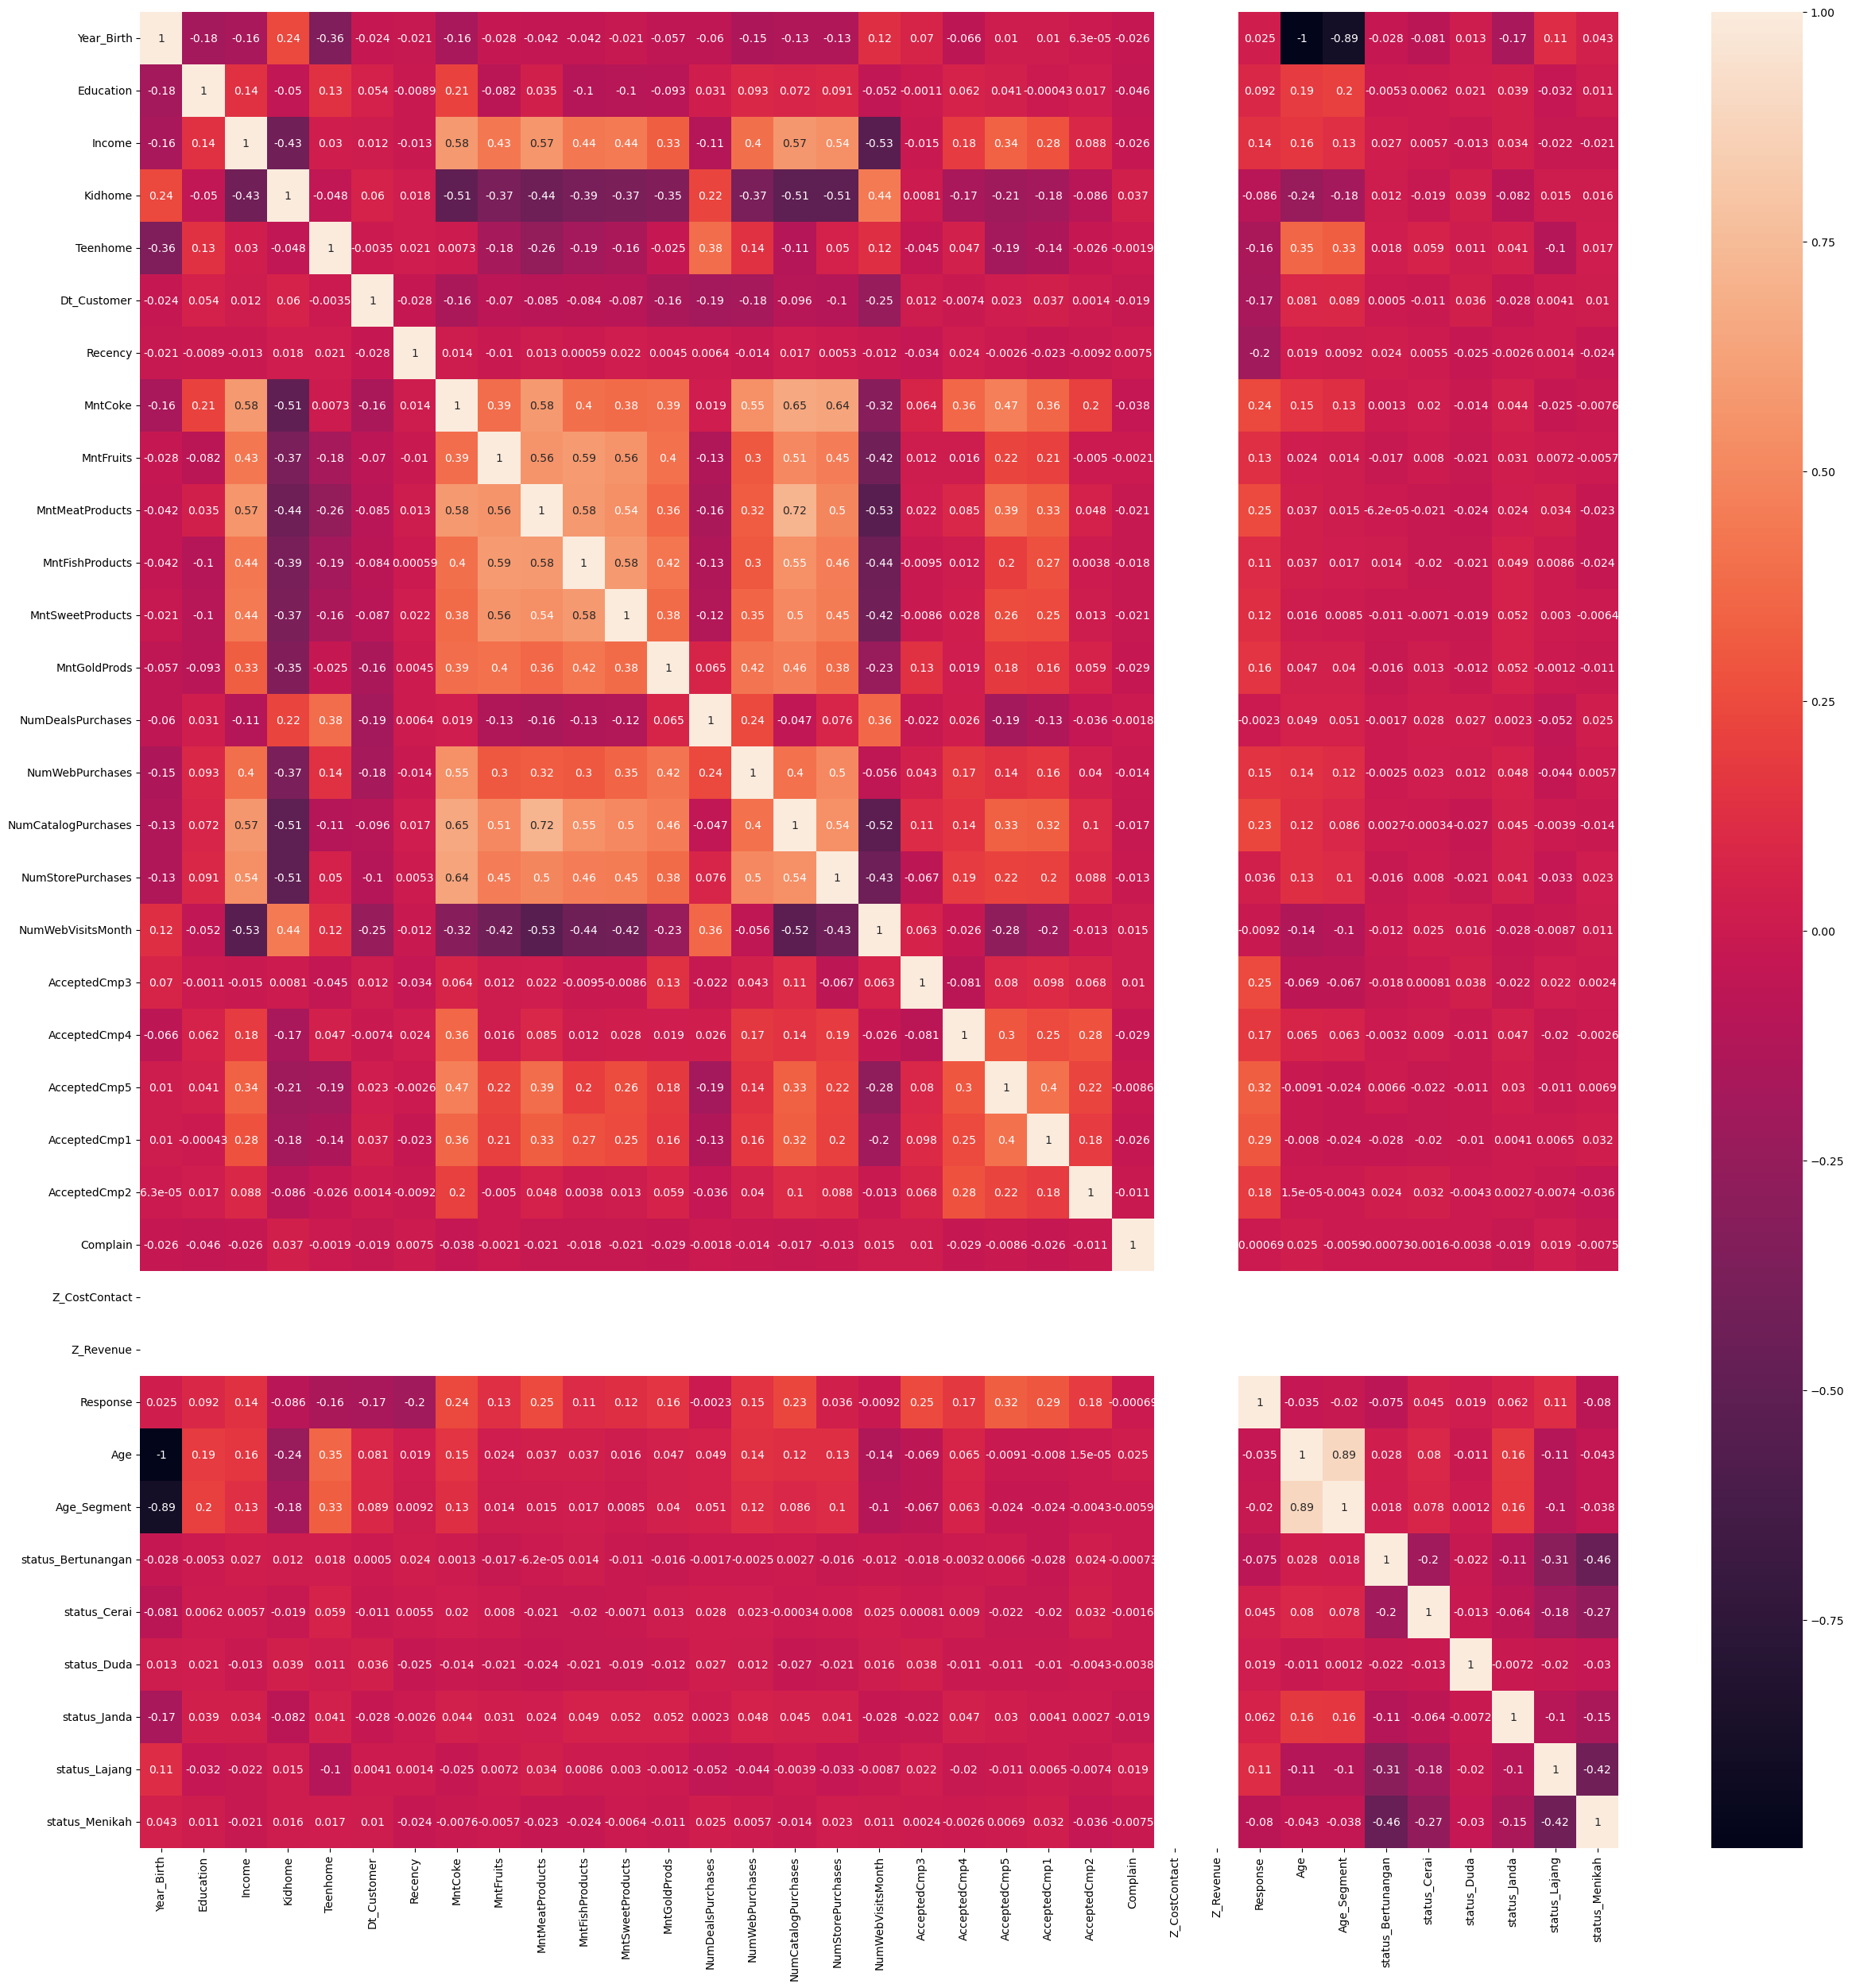

In [28]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Data Modeling

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2046 non-null   int64  
 1   Education            2046 non-null   int64  
 2   Income               2046 non-null   float64
 3   Kidhome              2046 non-null   int64  
 4   Teenhome             2046 non-null   int64  
 5   Dt_Customer          2046 non-null   int64  
 6   Recency              2046 non-null   int64  
 7   MntCoke              2046 non-null   float64
 8   MntFruits            2046 non-null   float64
 9   MntMeatProducts      2046 non-null   float64
 10  MntFishProducts      2046 non-null   float64
 11  MntSweetProducts     2046 non-null   float64
 12  MntGoldProds         2046 non-null   float64
 13  NumDealsPurchases    2046 non-null   int64  
 14  NumWebPurchases      2046 non-null   int64  
 15  NumCatalogPurchases  2046 non-null   i

In [30]:
df['status_Bertunangan'] = df['status_Bertunangan'].astype('float64')
df['status_Cerai'] = df['status_Cerai'].astype('float64')
df['status_Duda'] = df['status_Duda'].astype('float64')
df['status_Janda'] = df['status_Janda'].astype('float64')
df['status_Lajang'] = df['status_Lajang'].astype('float64')
df['status_Menikah'] = df['status_Menikah'].astype('float64')

In [31]:
inertia = []

for i in range(1, 35):
    x = KMeans(n_clusters=i, random_state=42, init='k-means++', n_init=10, max_iter=300)
    x.fit(df.values)
    inertia.append(x.inertia_)

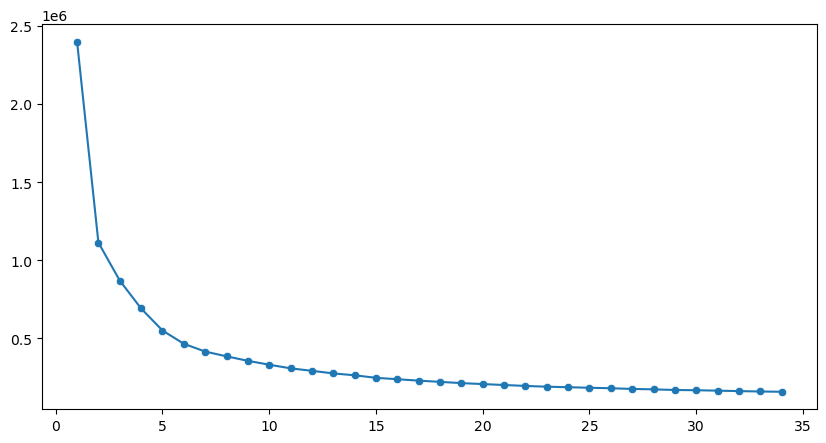

In [32]:

plt.figure(figsize=(10,5))
sns.lineplot(y = inertia, x=range(1, 35))
sns.scatterplot(y = inertia, x=range(1, 35))
plt.show()

In [33]:
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans.fit(df.values)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=5, random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', n_clusters=5, random_state=42)

In [34]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_
df['cluster'] = labels

In [35]:
df

,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Segment,status_Bertunangan,status_Cerai,status_Duda,status_Janda,status_Lajang,status_Menikah,cluster
0,1957,2,0.241847,0,0,2012,58,0.981245,1.558519,1.716089,2.477888,1.453863,0.854509,3,8,10,4,7,0,0,0,0,0,0,3,11,1,55,2,0.0,0.0,0.0,0.0,1.0,0.0,1
1,1954,2,-0.230884,1,1,2014,38,-0.870475,-0.635700,-0.718324,-0.645820,-0.627953,-0.729941,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,2,0.0,0.0,0.0,0.0,1.0,0.0,0
2,1965,2,0.781956,0,0,2013,26,0.361037,0.574903,-0.172835,1.357028,-0.149374,-0.034329,1,8,2,10,4,0,0,0,0,0,0,3,11,0,48,2,1.0,0.0,0.0,0.0,0.0,0.0,0
3,1984,2,-1.020425,1,0,2014,26,-0.870475,-0.560037,-0.655210,-0.498822,-0.580095,-0.749264,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,1,1.0,0.0,0.0,0.0,0.0,0.0,0
4,1981,4,0.248059,1,0,2014,94,-0.389740,0.423578,-0.213409,0.162670,-0.005801,-0.556038,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,1,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,1977,2,24.633043,1,0,2013,23,-0.876410,-0.307828,-0.664226,-0.535571,-0.627953,-0.614006,4,3,1,3,6,0,0,0,0,0,0,3,11,0,36,1,1.0,0.0,0.0,0.0,0.0,0.0,0
2235,1967,2,0.365501,0,1,2013,46,1.200840,0.423578,0.075114,0.089171,2.171730,3.926796,2,9,3,4,5,0,0,0,0,0,0,3,11,0,46,2,0.0,0.0,0.0,0.0,0.0,1.0,0
2237,1981,2,0.195471,0,0,2014,91,1.791372,0.549683,0.232900,-0.094577,-0.364735,-0.382135,1,2,3,13,6,0,1,0,0,0,0,3,11,0,33,1,0.0,1.0,0.0,0.0,0.0,0.0,1
2238,1956,3,0.687041,0,1,2014,8,0.366972,0.095706,0.219376,0.787411,0.065986,0.332799,2,6,5,10,3,0,0,0,0,0,0,3,11,0,58,2,1.0,0.0,0.0,0.0,0.0,0.0,0


## Silhouette plot

In [36]:
range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=42).fit(df)
    preds = kmeans.predict(df)
     
    score_euclidean = silhouette_score(df, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

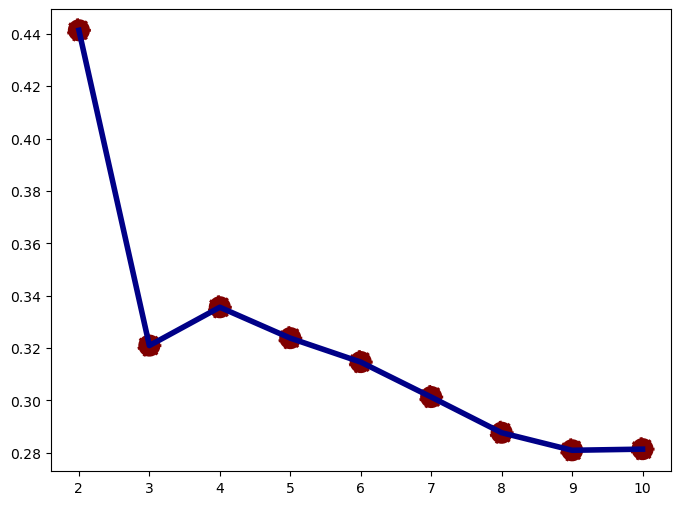

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.show()

In [38]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=3)
pca.fit(df)
pcs = pca.transform(df)
final_pca = pd.DataFrame(data = pcs, columns = ['PC1', 'PC2','PC3'])
final_pca['Cluster'] = labels
final_pca.head()

,PC1,PC2,PC3,Cluster
0,9.379010,15.980361,-4.187760,1
1,-10.537589,21.548198,5.887197,0
2,-22.826334,5.989796,-4.276045,0
3,-23.302745,-20.581721,3.143071,0
4,44.774278,-17.302019,-1.429180,1


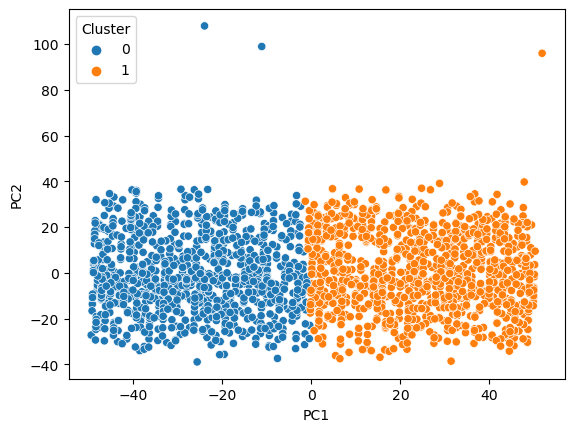

In [39]:
sns.scatterplot(x='PC1', y='PC2', data=final_pca, hue='Cluster')
plt.show()